# Exercise 10

1. Using the dataset in EFIplus_medit.zip run a PCA based on quantitative environmental variables (see previous exercise), using sites from the Douro, Tejo, Mondego and Minho basins. Produce a biplot with ‘Catchment_name’ as a grouping variable.


In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from scipy.spatial.distance import pdist, squareform
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [17]:
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")
print(df.head())

    Site_code   Latitude  Longitude Country Catchment_name  Galiza  Subsample  \
0  ES_01_0002  38.102003  -4.096070   Spain   Guadalquivir       0          1   
1  ES_02_0001  40.530188  -1.887796   Spain           Tejo       0          1   
2  ES_02_0002  40.595432  -1.928079   Spain           Tejo       0          1   
3  ES_02_0003  40.656184  -1.989831   Spain           Tejo       0          1   
4  ES_02_0004  40.676402  -2.036274   Spain           Tejo       0          1   

   Calib_EFI_Medit  Calib_connect  Calib_hydrol  ...  Squalius malacitanus  \
0                0              1             0  ...                     0   
1                1              1             1  ...                     0   
2                1              1             1  ...                     0   
3                1              1             1  ...                     0   
4                1              1             1  ...                     0   

   Squalius pyrenaicus  Squalius torgalensis

In [18]:
basins = ['Douro', 'Tejo', 'Mondego', 'Minho']
df_filtered = df[df['Catchment_name'].isin(basins)]
print(df_filtered.head())

    Site_code   Latitude  Longitude Country Catchment_name  Galiza  Subsample  \
1  ES_02_0001  40.530188  -1.887796   Spain           Tejo       0          1   
2  ES_02_0002  40.595432  -1.928079   Spain           Tejo       0          1   
3  ES_02_0003  40.656184  -1.989831   Spain           Tejo       0          1   
4  ES_02_0004  40.676402  -2.036274   Spain           Tejo       0          1   
5  ES_02_0005  40.732830  -2.078003   Spain           Tejo       0          1   

   Calib_EFI_Medit  Calib_connect  Calib_hydrol  ...  Squalius malacitanus  \
1                1              1             1  ...                     0   
2                1              1             1  ...                     0   
3                1              1             1  ...                     0   
4                1              1             1  ...                     0   
5                1              1             1  ...                     0   

   Squalius pyrenaicus  Squalius torgalensis

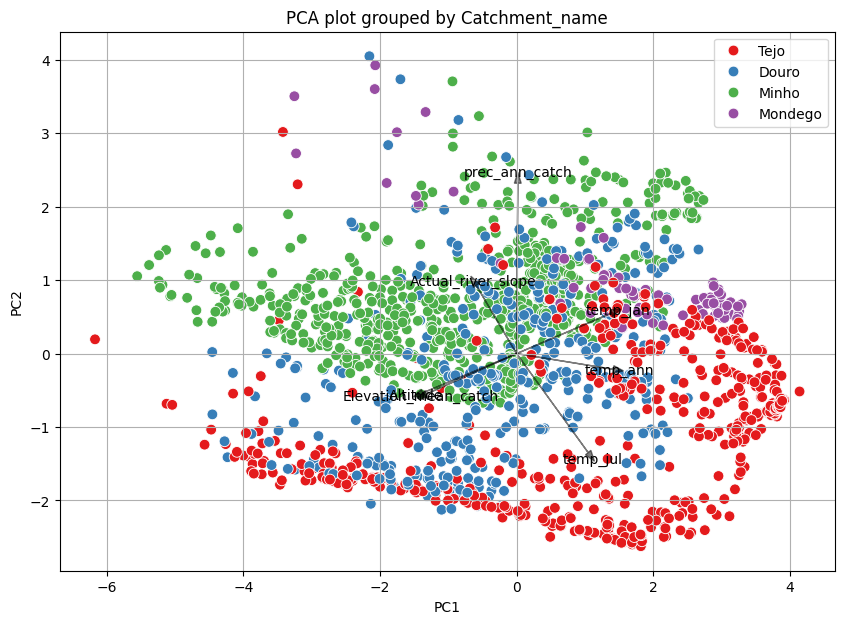

In [19]:
quant_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']
X = df_filtered[quant_vars].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Catchment_name'] = df_filtered.loc[X.index, 'Catchment_name'].values

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Catchment_name', palette='Set1', s=60)

for i, var in enumerate(quant_vars):
    plt.arrow(0, 0, pca.components_[0, i]*3, pca.components_[1, i]*3, color='black', alpha=0.5, head_width=0.1)
    plt.text(pca.components_[0, i]*3.2, pca.components_[1, i]*3.2, var, color='black', ha='center', va='center')

plt.title('PCA plot grouped by Catchment_name')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.legend()
plt.show()

2. Using the same data, run a PCoA and project the sites using the resulting first two axis. Use also the ‘Catchment_name’ as a grouping variable.

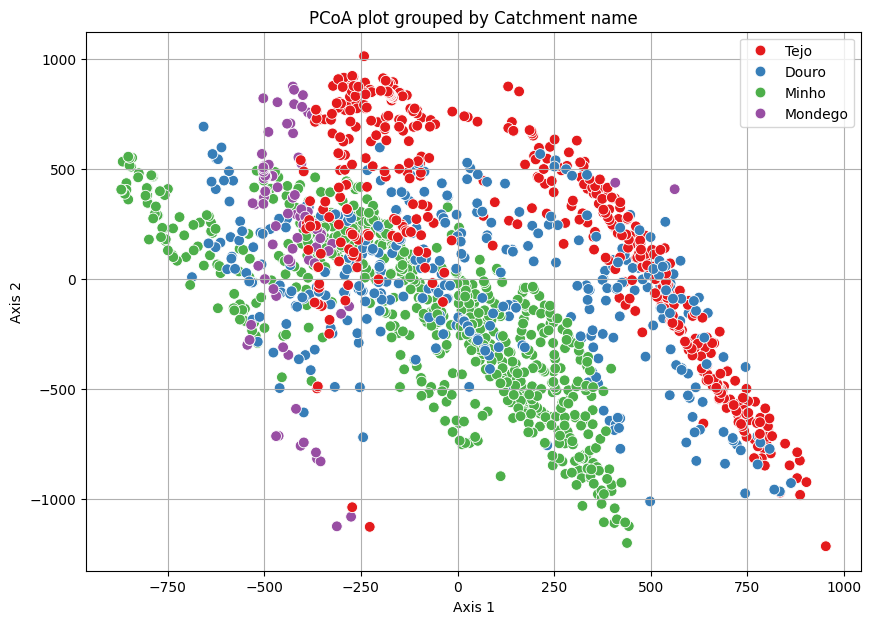

In [20]:
dist_matrix = squareform(pdist(X, metric='euclidean'))

mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
pcoa_coords = mds.fit_transform(dist_matrix)

df_pcoa = pd.DataFrame(pcoa_coords, columns=['Axis1', 'Axis2'])
df_pcoa['Catchment_name'] = df_filtered.loc[X.index, 'Catchment_name'].values

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_pcoa, x='Axis1', y='Axis2', hue='Catchment_name', palette='Set1', s=60)
plt.title('PCoA plot grouped by Catchment name')
plt.xlabel('Axis 1')
plt.ylabel('Axis 2')
plt.grid(True)
plt.legend()
plt.show()

3. Run a Linear Discriminant Analysis based on quantitative environmental variables (see previous
exercises), using the Douro, Tejo, Mondego and Minho basins as the pre-determined groups. Produce a
biplot with ‘Catchment_name’ as a grouping variable. 

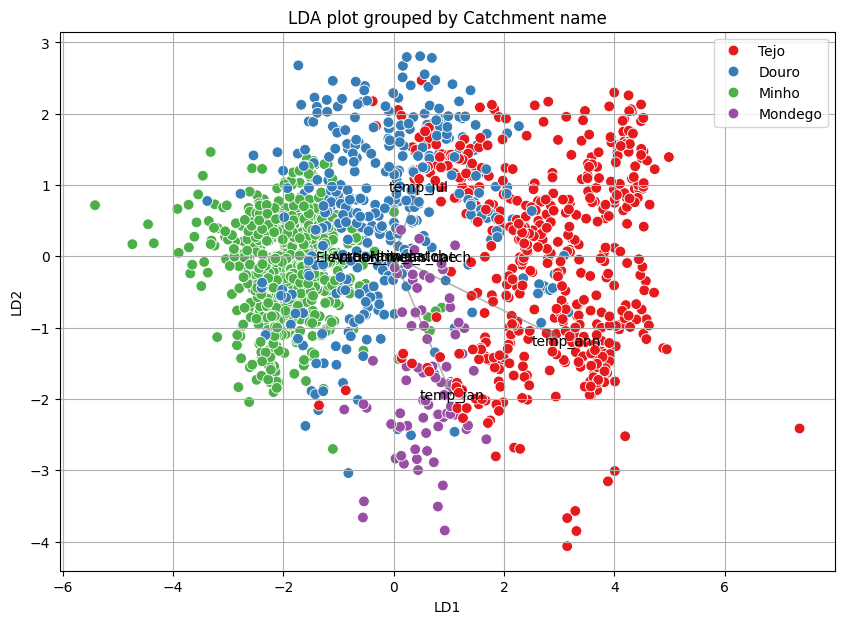

In [21]:
X_lda = X
y_lda = df_filtered.loc[X.index, 'Catchment_name']

lda = LinearDiscriminantAnalysis(n_components=2)
lda_components = lda.fit_transform(X_lda, y_lda)

df_lda = pd.DataFrame(lda_components, columns=['LD1', 'LD2'])
df_lda['Catchment_name'] = y_lda.values

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_lda, x='LD1', y='LD2', hue='Catchment_name', palette='Set1', s=60)

scalings = lda.scalings_[:, :2]
for i, var in enumerate(quant_vars):
    plt.arrow(0, 0, scalings[i, 0]*2, scalings[i, 1]*2, color='gray', alpha=0.5, head_width=0.1)
    plt.text(scalings[i, 0]*2.2, scalings[i, 1]*2.2, var, color='black', ha='center', va='center')

plt.title('LDA plot grouped by Catchment name')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.grid(True)
plt.legend()
plt.show()